### Implementing Tarrataca’s quantum production system with the 3-puzzle problem
This Python script demonstrates Tarrataca's quantum production system to solve the 3-puzzle problem using IBM's Qiskit library. In this quantum circuit, a 3-qubit system is prepared to generate a specific arrangement, in this case, the 'ABC' permutation. The operations include applying a Hadamard gate to the first qubit (qc.h(0)), followed by controlled-X (CNOT) gates to entangle the qubits and create the desired arrangement. Finally, the qubits are measured, and the results are simulated using a quantum simulator.

The code utilizes the Qiskit Aer backend for simulation and transpile functions to optimize and compile the quantum circuit. The measurement results are then obtained and displayed in the form of a histogram using the plot_histogram function from Qiskit's visualization module.

This implementation provides a practical example of using quantum computing techniques to address combinatorial problems, specifically the 3-puzzle problem in this case.

In [1]:
# !pip install qiskit
# !pip install qiskit-aer

In [2]:
from qiskit import QuantumCircuit, transpile, assemble, Aer
from qiskit.visualization import plot_histogram

In [3]:
# Defining a quantum circuit with 3 qubits
qc = QuantumCircuit(3, 3)

In [4]:
'''
Applying operations to create the desired arrangement (ABC permutation)
For example, let's create the arrangement 'ABC'
'''
qc.h(0)  # Applying Hadamard gate to qubit 0
qc.cx(0, 1)  # Applying CNOT gate between qubit 0 and qubit 1
qc.cx(0, 2)  # Applying CNOT gate between qubit 0 and qubit 2

In [5]:
# Measuring the qubits to obtain the final result
qc.measure([0, 1, 2], [0, 1, 2])
simulator = Aer.get_backend('qasm_simulator')

In [6]:
# Executing the circuit on the simulator
compiled_circuit = transpile(qc, simulator)
qobj = assemble(compiled_circuit)
result = simulator.run(qobj).result()

<ipython-input-6-15eeb7d70b56>:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  result = simulator.run(qobj).result()


Measurement results: {'111': 498, '000': 526}


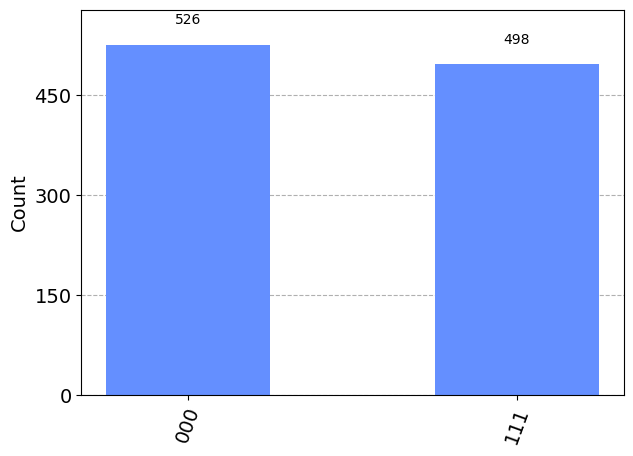

In [7]:
# Getting the counts of the results
counts = result.get_counts()
print("Measurement results:", counts)

# Visualising the measurement results
plot_histogram(counts)